In [10]:
import csv 
import json

csvpath = r'UNFCCC_v26.csv'
jsonpath = r'UNFCCC_v26.json'

convert_csv_into_json(csvpath, jsonpath)


def convert_csv_into_json(csvpath, jsonpath):
    array4json = []
      
    #reading the csv file from csv path
    with (open(csvpath, encoding='utf-8') as csvf): 
        csvReader = csv.DictReader(csvf) 

        rowcount = 0
        for row in csvReader: 
            #Read only Car specific and Total data
            if  row['Pollutant_name'] == 'All greenhouse gases - (CO2 equivalent)' and (row['Sector_name'] == '1.A.3.b.i - Cars'  or row['Sector_name'] == 'Total emissions (UNFCCC)') :
                array4json.append(row)
                #print(row['Pollutant_name'])
                rowcount += 1
    with open(jsonpath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(array4json, indent=4)
        jsonf.write(jsonString)
          






All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)
All greenhouse gases - (CO2 equivalent)


In [21]:
import psycopg2 

createString = """
CREATE TABLE IF NOT EXISTS GreenHouse_CO2 (
Country_code char(20),
Country	varchar(50),
Format_name	varchar(50),
Pollutant_name	varchar(200),
Sector_code	varchar(50),
Sector_name	varchar(300),
Parent_sector_code	varchar(30),
Unit	varchar(30),
Year	integer,
emissions	numeric, 
Notation varchar(30),
PublicationDate integer,
DataSource varchar(30)
);
"""

insertdata = '''COPY GreenHouse_CO2(Country_code, Country, Format_name, Pollutant_name, Sector_code, Sector_name, Parent_sector_code, Unit, Year, emissions) FROM 'UNFCCC_v26.csv' 
DELIMITER ',' 
CSV HEADER;'''

readdata = '''select count(*) from GreenHouse_CO2;'''


In [51]:
try :
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute("drop table GreenHouse_CO2;")
    #dbCursor.execute(createString)
    dbCursor.execute(readdata)
    print (dbCursor.fetchall())
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

[(2080,)]


In [50]:
import csv


try:
    dbConnection = psycopg2.connect(
                            user = "dap",
                            password = "dap",
                            host = "192.168.56.30",
                            port = "5432",
                            database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #insertString = "INSERT INTO GreenHouse_CO2 VALUES ('{}',"+"'{}',"*8+"'to_number({}, '9999999999.99999')','{}','{}','{}')"
    insertString = "INSERT INTO GreenHouse_CO2 VALUES ('{}'," + "'{}',"*8 + "cast(coalesce(nullif('{}',''),'0') as float),'{}','{}','{}')"

    #print(insertString)
    with open('UNFCCC_v26.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader) # skip the header
        for row in reader:
            #print(insertString.format(*row))
            if  row[3] == 'All greenhouse gases - (CO2 equivalent)' and (row[5] == '1.A.3.b.i - Cars'  or row[5] == 'Total emissions (UNFCCC)') and row[8] != '1985-1987'  :
                dbCursor.execute(insertString.format(*row))
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

In [95]:
readCO2Emissions_cars = '''Select Year,  
    sum(emissions) as CarsEmission
    from GreenHouse_CO2
    where Sector_name = '1.A.3.b.i - Cars' and Country_code = 'EUA'
    group by  Year
'''

readCO2Emissions_ALL = '''Select Year,
    sum(emissions) as TotalEmission
    from GreenHouse_CO2
    where Sector_name = 'Total emissions (UNFCCC)' and Country_code = 'EUA'
    group by  Year
'''


try:
    dbConnection = psycopg2.connect(user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(readCO2Emissions_cars)
  
    CO2_cars_Only = dbCursor.fetchall(); 

    dbCursor.execute(readCO2Emissions_ALL)
    CO2_all_sector = dbCursor.fetchall(); 

    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()


(2008, Decimal('480951.23224'))
(1994, Decimal('413206.13667'))
(2014, Decimal('458349.51112'))
(2010, Decimal('470814.63768'))
(2019, Decimal('483220.2505'))
(1991, Decimal('394510.12301'))
(1996, Decimal('431891.76723'))
(2000, Decimal('457223.42201'))
(2011, Decimal('464550.59445'))
(2017, Decimal('483452.27248'))
(2009, Decimal('476868.11133'))
(2005, Decimal('480541.41953'))
(2013, Decimal('448657.44576'))
(2003, Decimal('477794.44771'))
(2015, Decimal('466627.86469'))
(1993, Decimal('410755.30427'))
(1990, Decimal('388860.35004'))
(1998, Decimal('450957.85969'))
(2007, Decimal('488774.54313'))
(2002, Decimal('473396.40814'))
(2004, Decimal('484375.45057'))
(1997, Decimal('436377.19381'))
(2006, Decimal('482224.75376'))
(2020, Decimal('406560.92397'))
(2001, Decimal('464389.6384'))
(2016, Decimal('477579.92817'))
(1999, Decimal('461226.43213'))
(2012, Decimal('446069.6603'))
(2018, Decimal('480336.43331'))
(1995, Decimal('421372.964'))
(1992, Decimal('407381.07945'))
(2021, Decima

    Year  CarsEmission    AllEmission
0   1990  388860.35004  4866997.59775
1   1991  394510.12301  4761867.85835
2   1992  407381.07945  4611658.68219
3   1993  410755.30427  4533165.14753
4   1994  413206.13667  4509714.05572
5   1995    421372.964  4560147.85956
6   1996  431891.76723  4650978.34252
7   1997  436377.19381  4579674.03966
8   1998  450957.85969  4540461.70646
9   1999  461226.43213   4464183.3389
10  2000  457223.42201   4452021.6243
11  2001   464389.6384  4500256.33936
12  2002  473396.40814  4485727.99169
13  2003  477794.44771  4566353.96585
14  2004  484375.45057  4568722.10312
15  2005  480541.41953  4541881.89835
16  2006  482224.75376  4538039.03394
17  2007  488774.54313  4502767.65157
18  2008  480951.23224  4408412.25575
19  2009  476868.11133  4092959.28975
20  2010  470814.63768  4180741.67268
21  2011  464550.59445  4069866.13577
22  2012   446069.6603  3995310.05734
23  2013  448657.44576  3908576.75698
24  2014  458349.51112  3767739.32618
25  2015  46

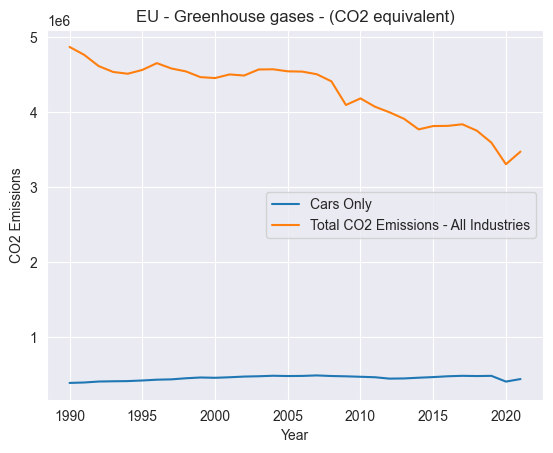

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(CO2_cars_Only, columns =['Year', 'CarsEmission'])
sorted_df_cars = df.sort_values('Year').reindex()

df1 = pd.DataFrame(CO2_all_sector, columns =['Year', 'AllEmission'])
sorted_df_all = df1.sort_values('Year').reindex()

df_combined = pd.merge(sorted_df_cars, sorted_df_all, on='Year')

plt.plot(df_combined['Year'], df_combined['CarsEmission'], label = 'Cars Only')
plt.plot(df_combined['Year'], df_combined['AllEmission'], label = 'Total CO2 Emissions - All Industries')
plt.title("EU - Greenhouse gases - (CO2 equivalent)")
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


In [396]:
import psycopg2 
import pandas as pd

readActualAndForecastString = '''select * from EU_CARS_ACTUAL_AND_FORECAST;'''


try :
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "climate")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(readActualAndForecastString)
    output = dbCursor.fetchall()
    columns = ['Year', 'EVCars', 'EVCarsPercentage', 'AllCars_Total']
    df_EU_CARS_ACTUAL_AND_FORECAST = pd.DataFrame(output, columns=columns)
    #print (df_EU_CARS_ACTUAL_AND_FORECAST)
    df_EU_CARS_ACTUAL_AND_FORECAST.set_index("Year", inplace=True)
    #print (df_EU_CARS_ACTUAL_AND_FORECAST)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection):
        dbConnection.close()

                  EVCars      EVCarsPercentage                  AllCars_Total
Year                                                                         
2010                2840   0.00139999995008111  202857150.0902884007647119615
2011               10430  0.004999999888241291  208600004.6625734436966377370
2012               30900  0.014000000432133675  220714278.9015662523779437217
2013               77000   0.03500000014901161  219999999.0633555982734540085
2014              133000   0.05999999865889549  221666671.6213028838003051590
2015              250000   0.10999999940395355  227272728.5042282091523548550
2016              370000   0.17000000178813934  217647056.5342160939762596841
2017              510000   0.23000000417232513  221739126.4123142198506723437
2018              750000   0.33000001311302185  227272718.2417208478406695172
2019             1090000   0.44999998807907104  242222228.6389199558609828554
2020             2180000    0.8600000143051147  253488367.876534

C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rames\PycharmProjects\pythonProject\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


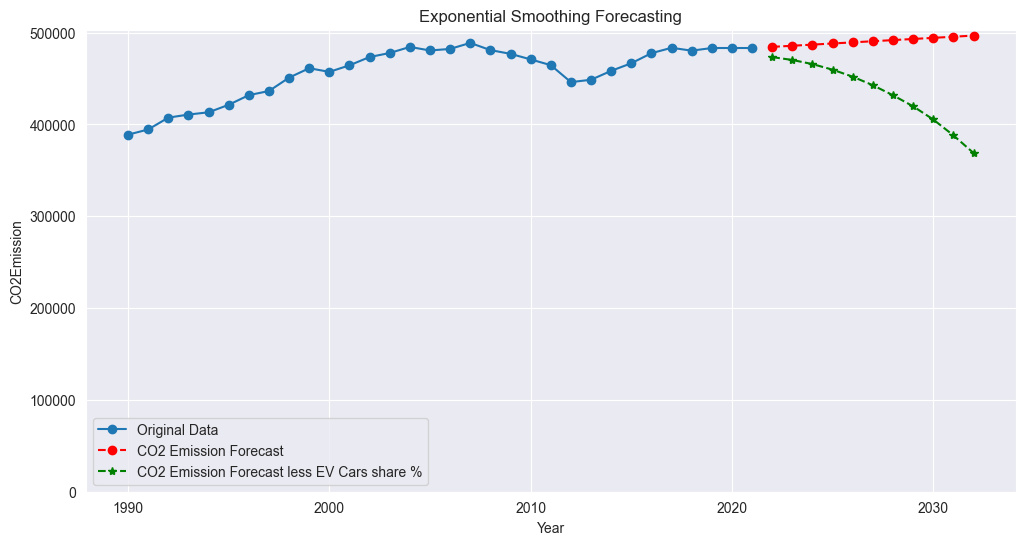

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

values_for_plot = df_combined['CarsEmission'].values

#2020 and 2021 CO2 emission values are low during Covid hance using 2019 data for forecasting
values_for_forecast = df_combined
values_for_forecast.loc[2020] = values_for_forecast.loc[2019] 
values_for_forecast.loc[2021] = values_for_forecast.loc[2019] 

# Fit Exponential Smoothing model
model = ExponentialSmoothing(values_for_forecast['CarsEmission'].astype(float),  trend='add', seasonal=None)
fit_model = model.fit()

# Forecasting
forecast_steps = 11
forecast = fit_model.forecast(steps=forecast_steps)

EU_cars_last_forecast_steps =  df_EU_CARS_ACTUAL_AND_FORECAST.iloc[-forecast_steps:]


custom_index = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]
forecast.index = custom_index
EU_cars_last_forecast_steps_pd_series = EU_cars_last_forecast_steps['EVCarsPercentage'].astype(float)

forecast_less_ev_percentage = forecast*(1 - EU_cars_last_forecast_steps_pd_series/100) 

forecast_index = np.arange(df_combined.index.max() +1, df_combined.index.max() + forecast_steps + 1)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index.values,  values_for_plot, label='Original Data', marker='o')
plt.plot(forecast_index, forecast, label='CO2 Emission Forecast', color='red', linestyle='--', marker='o')
plt.plot(forecast_index, forecast_less_ev_percentage, label='CO2 Emission Forecast less EV Cars share %', color='green', linestyle='--', marker='*')
plt.title('Exponential Smoothing Forecasting')
plt.ylim(bottom=0)
plt.xlabel('Year')
plt.ylabel('CO2Emission')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(df['values'], fit_model.fittedvalues)
rmse = sqrt(mse)
